# Study of dataset

I want to learn, and the best way is learning by doing. So, taking advantaje of the fact that I have a weekly automated ingestion of a side project (check it out here => ------), and that ingestion populates a BigQuery table, **I want to deploy and use in production a ML algorithm, to infere some of the keywords with 1 week in advance**.  

In [83]:
import pandas as pd

In [84]:
df_gdelt_raw= pd.read_csv("input/bq_export.csv")

This is my dataset
- All the keywords are in the "news_in_Spain" column.
- One of those keywords is "desempleo", which means "unemployment". Based on the other keywords, I will infere this one. How? I will explain the idea in the way :D

In [85]:
df_gdelt_raw.head()

,Unnamed: 0,Date,news_in_Spain
0,0,2015-07-24,juicio
1,1,2015-07-24,juicio
2,2,2015-07-24,juicio
3,3,2015-07-24,juicio
4,4,2015-07-24,juicio


## First of all: Discarding columns.

- This project is based on time. We need that column
- SourceCommonName: Certainly some newspapers talk more about unemployment-related topics than others, we can see it here => . But I will start as simplest as possible, so this column will be deleted.
- v2counts. Using it is cheating. "unemployment" is literally written there
- v2location is a column to check that all news are in about Spain

In [86]:
df_gdelt_raw = df_gdelt_raw.rename(columns={"news_in_Spain":"keyword"})

In [87]:
df_gdelt_raw.columns

Index(['Unnamed: 0', 'Date', 'keyword'], dtype='object')

In [88]:
# deleting columns
#df_raw.drop(['v2counts', 'Sentiment','v2locations','SourceCommonName'], axis=1, inplace=True)
df_gdelt=df_gdelt_raw[["Date","keyword"]].copy()

In [89]:
df_gdelt.head()

,Date,keyword
0,2015-07-24,juicio
1,2015-07-24,juicio
2,2015-07-24,juicio
3,2015-07-24,juicio
4,2015-07-24,juicio


In [90]:
df_gdelt.Date.describe()

count         480978
unique          2013
top       2017-08-18
freq            1277
Name: Date, dtype: object

- First of all, let's be good lads and work with datetime, in my case, the requested information goes by day, so:

In [91]:
df_gdelt['Date'] = pd.to_datetime(df_gdelt['Date']) #- pd.to_timedelta(7, unit='d')

- Let's turn all categorical data into numerical

In [92]:
df_gdelt = pd.get_dummies(df_gdelt, columns = ['keyword'],prefix='',prefix_sep='')
# prefix='',prefix_sep='' => to avvoid the prefix "keyword_+..." in name columns

In [93]:
#df_gdelt.describe()

### Google trends is weekly ingested, so we'll group by week, starting on mondays

In [94]:
df_gdelt.index=df_gdelt.Date
df_gdelt = df_gdelt.resample('W-SUN').sum() #weekly totals

In [95]:
df_gdelt.sort_values(by="Date", ascending=True, inplace=True)

- Lets check it out from 2019, which is the first year for my pytrends database

In [96]:
df_gdelt = df_gdelt[(df_gdelt.index > '2019-01-01')]

In [97]:
df_gdelt

,agresion_sexual,banco_mundial,censura_en_medios,ciencia,corrupcion,crecimiento_economico,desempleo,ejercito,emergencia_sanitaria,emprendimiento,...,racismo,rebelion,refugiados,seguridad_nacional,stock_market,subsidios,terrorismo,vacunas,vigilancia,violencia_politica_y_guerra_civil
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-06,16.0,0.0,0.0,7.0,68.0,1.0,27.0,42.0,52.0,1.0,...,0.0,12.0,7.0,17.0,27.0,0.0,38.0,8.0,17.0,0.0
2019-01-13,28.0,0.0,0.0,45.0,108.0,0.0,4.0,32.0,44.0,1.0,...,0.0,9.0,7.0,3.0,39.0,0.0,9.0,1.0,23.0,0.0
2019-01-20,1.0,0.0,0.0,10.0,84.0,0.0,24.0,18.0,49.0,0.0,...,0.0,9.0,0.0,4.0,40.0,0.0,35.0,3.0,34.0,0.0
2019-01-27,1.0,0.0,0.0,12.0,89.0,2.0,7.0,41.0,22.0,6.0,...,0.0,16.0,14.0,5.0,33.0,0.0,15.0,0.0,9.0,0.0
2019-02-03,22.0,1.0,1.0,22.0,78.0,0.0,6.0,14.0,38.0,1.0,...,0.0,19.0,5.0,2.0,23.0,0.0,11.0,0.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-26,0.0,0.0,1.0,12.0,111.0,0.0,6.0,51.0,267.0,1.0,...,0.0,8.0,0.0,8.0,18.0,0.0,9.0,1.0,17.0,0.0
2020-08-02,1.0,0.0,6.0,15.0,122.0,5.0,17.0,66.0,263.0,0.0,...,0.0,4.0,0.0,9.0,26.0,0.0,5.0,1.0,38.0,0.0
2020-08-09,0.0,0.0,0.0,21.0,72.0,0.0,11.0,40.0,318.0,1.0,...,0.0,3.0,3.0,1.0,31.0,0.0,1.0,0.0,36.0,0.0


- You can see the same day there are many occurrences. Let's group by day now

In [98]:
df_gdelt.describe()

,agresion_sexual,banco_mundial,censura_en_medios,ciencia,corrupcion,crecimiento_economico,desempleo,ejercito,emergencia_sanitaria,emprendimiento,...,racismo,rebelion,refugiados,seguridad_nacional,stock_market,subsidios,terrorismo,vacunas,vigilancia,violencia_politica_y_guerra_civil
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,2.534884,0.034884,0.209302,18.813953,79.127907,2.244186,11.639535,34.174419,115.546512,1.651163,...,0.267442,8.941860,3.941860,6.395349,33.267442,0.093023,14.395349,1.290698,17.046512,0.0
std,5.547013,0.239984,0.721376,10.382691,25.589886,3.001709,8.002812,23.426075,118.247065,1.889709,...,1.221613,8.576788,3.875579,5.211478,17.099312,0.292169,12.609314,3.429513,15.093362,0.0
min,0.000000,0.000000,0.000000,2.000000,41.000000,0.000000,1.000000,7.000000,15.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000,0.0
25%,0.000000,0.000000,0.000000,12.250000,64.000000,0.000000,6.000000,18.000000,37.250000,1.000000,...,0.000000,4.000000,1.000000,3.000000,22.250000,0.000000,6.000000,0.000000,9.000000,0.0
50%,1.000000,0.000000,0.000000,16.000000,73.000000,1.500000,9.000000,26.500000,47.000000,1.000000,...,0.000000,7.000000,3.000000,5.000000,28.500000,0.000000,10.000000,0.000000,13.000000,0.0
75%,2.000000,0.000000,0.000000,22.000000,90.750000,3.000000,16.000000,41.000000,251.750000,2.000000,...,0.000000,12.000000,5.750000,8.000000,39.000000,0.000000,18.750000,1.000000,21.000000,0.0
max,28.000000,2.000000,6.000000,53.000000,171.000000,14.000000,42.000000,135.000000,368.000000,9.000000,...,10.000000,61.000000,20.000000,24.000000,97.000000,1.000000,62.000000,29.000000,98.000000,0.0


# Pytrends script

In [99]:
df_pytrends_raw=pd.read_csv("input/data_pytrends.csv")

In [100]:
df_pytrends_raw.head()

,Unnamed: 0,keyword,date,trend_index
0,0,zoom,2019-01-06,5
1,1,zoom,2019-01-13,5
2,2,zoom,2019-01-20,4
3,3,zoom,2019-01-27,4
4,4,zoom,2019-02-03,4


In [101]:
df_pytrends_raw['date'] = pd.to_datetime(df_pytrends_raw['date']) #- pd.to_timedelta(7, unit='d')

In [102]:
df_pytrends_raw.index=df_pytrends_raw.date

In [109]:
df_pytrends_raw.columns

Index(['Unnamed: 0', 'keyword', 'date', 'trend_index'], dtype='object')

In [111]:
df_pytrends_raw.drop(columns='Unnamed: 0',inplace=True)

In [112]:
keywords=set(df_pytrends_raw.keyword)
print(keywords)


{'crisis política', 'comedor social', 'infeccion', 'protesta', 'independentismo', 'idealista', 'remoto', 'hipoteca', 'menu escolar', 'emprendimiento', 'caritas', 'paro', 'pp', 'netflix', 'autonomo', 'desescalada', 'just eat', 'taxi', 'refugiados', 'vox', 'desempleo', 'inmigracion', 'en familia', 'meditacion', 'estado de alarma', 'glovo', 'hbo', 'en casa', 'pandemia', 'medico', 'podemos', 'pnv', 'skype', 'videoconferencia', 'ayuda alquiler', 'cabify', 'cruz roja', 'manifestacion', 'yoga', 'formacion', 'deliveroo', 'uber eats', 'erc', 'divorcio', 'disney', 'corrupcion', 'piso barato', 'sepe', 'productividad', 'nacionalismo', 'embarazo', 'crisis economica', 'comparecencia', 'hangouts', 'uber', 'banco alimentos', 'tinder', 'ciudadanos', 'videollamada', 'coronavirus', 'bildu', 'examenes', 'barometro', 'clases online', 'compromis', 'amazon', 'residencia ancianos', 'badi', 'mas pais', 'deshaucio', 'hacer deporte', 'erte', 'steam', 'compartir piso', 'cursos online', 'negocio online', 'teletrab

In [113]:
df_pytrends=df_pytrends_raw[df_pytrends_raw["keyword"].isin(["protesta","independentismo","hipoteca","paro","desempleo","deshaucio"])]

In [114]:
df_pytrends

,keyword,date,trend_index
date,,,
2019-01-06,independentismo,2019-01-06,6
2019-01-13,independentismo,2019-01-13,4
2019-01-20,independentismo,2019-01-20,5
2019-01-27,independentismo,2019-01-27,16
2019-02-03,independentismo,2019-02-03,12
...,...,...,...
2020-07-26,hipoteca,2020-07-26,95
2020-08-02,hipoteca,2020-08-02,81
2020-08-09,hipoteca,2020-08-09,77


In [121]:
# here we explode the pandas to get the columns

In [121]:
df_pytrends.groupby(df_pytrends.index)["keyword","trend_index"].mean()

/home/vargas/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,trend_index
date,
2019-01-06,33.000000
2019-01-13,30.500000
2019-01-20,29.666667
2019-01-27,35.833333
2019-02-03,35.500000
...,...
2020-07-26,37.333333
2020-08-02,39.000000
2020-08-09,32.500000


In [68]:
#df_pytrends_raw.groupby(df_pytrends_raw.index)["keyword","trend_index"].mean()

/home/vargas/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,trend_index
date,
2019-01-06,33.765432
2019-01-13,33.172840
2019-01-20,33.617284
2019-01-27,33.728395
2019-02-03,33.604938
...,...
2020-07-26,34.543210
2020-08-02,33.518519
2020-08-09,32.160494


In [55]:
df_pytrends = pd.get_dummies(df_pytrends, columns = ['keyword'],prefix='',prefix_sep='')


,Unnamed: 0,keyword,date,trend_index
0,0,zoom,2019-01-06,5
1,1,zoom,2019-01-13,5
2,2,zoom,2019-01-20,4
3,3,zoom,2019-01-27,4
4,4,zoom,2019-02-03,4
...,...,...,...,...
6961,6961,en familia,2020-07-26,56
6962,6962,en familia,2020-08-02,55
6963,6963,en familia,2020-08-09,55
6964,6964,en familia,2020-08-16,54


# Let's try to find some pattern

In [48]:
import numpy as np

In [49]:
#np.log(df_gdelt.desempleo)
df_gdelt.columns

Index(['agresion_sexual', 'banco_mundial', 'censura_en_medios', 'ciencia',
       'corrupcion', 'crecimiento_economico', 'desempleo', 'ejercito',
       'emergencia_sanitaria', 'emprendimiento', 'energias_renovables',
       'enfermedades_muy_infecciosas', 'extremismo', 'finanzas_y_bancos',
       'incertidumbre_economica', 'inestabilidad_politica',
       'inflacion_economica', 'inmigracion',
       'job_quality_&_labor_market_performance', 'juicio', 'libre_comercio',
       'macroeconomia_deuda_y_vulnerabilidad', 'pobreza', 'precio_petroleo',
       'precio_vivienda', 'prosperidad_economica_y_finanzas', 'protestas',
       'quiebra_economica', 'racismo', 'rebelion', 'refugiados',
       'seguridad_nacional', 'stock_market', 'subsidios', 'terrorismo',
       'vacunas', 'vigilancia', 'violencia_politica_y_guerra_civil'],
      dtype='object')

In [50]:
columns=list(df_gdelt.columns)

In [51]:
for c in columns:    
    df_gdelt[c+"_sqrt"]=df_gdelt[c].pow(1./2)
    df_gdelt[c+"*e2"]=df_gdelt[c].pow(2.)
    df_gdelt[c+"*e3"]=df_gdelt[c].pow(3.)
    df_gdelt[c+"_log"]=np.log(df_gdelt[c])
df_gdelt.columns

/home/vargas/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Index(['agresion_sexual', 'banco_mundial', 'censura_en_medios', 'ciencia',
       'corrupcion', 'crecimiento_economico', 'desempleo', 'ejercito',
       'emergencia_sanitaria', 'emprendimiento',
       ...
       'vacunas*e3', 'vacunas_log', 'vigilancia_sqrt', 'vigilancia*e2',
       'vigilancia*e3', 'vigilancia_log',
       'violencia_politica_y_guerra_civil_sqrt',
       'violencia_politica_y_guerra_civil*e2',
       'violencia_politica_y_guerra_civil*e3',
       'violencia_politica_y_guerra_civil_log'],
      dtype='object', length=190)

In [133]:
df_gdelt.columns

Index(['agresion_sexual', 'banco_mundial', 'censura_en_medios', 'ciencia',
       'corrupcion', 'crecimiento_economico', 'desempleo', 'ejercito',
       'emergencia_sanitaria', 'emprendimiento', 'energias_renovables',
       'enfermedades_muy_infecciosas', 'extremismo', 'finanzas_y_bancos',
       'incertidumbre_economica', 'inestabilidad_politica',
       'inflacion_economica', 'inmigracion',
       'job_quality_&_labor_market_performance', 'juicio', 'libre_comercio',
       'macroeconomia_deuda_y_vulnerabilidad', 'pobreza', 'precio_petroleo',
       'precio_vivienda', 'prosperidad_economica_y_finanzas', 'protestas',
       'quiebra_economica', 'racismo', 'rebelion', 'refugiados',
       'seguridad_nacional', 'stock_market', 'subsidios', 'terrorismo',
       'vacunas', 'vigilancia', 'violencia_politica_y_guerra_civil'],
      dtype='object')

In [ ]:
# this is for groupyng by week, but at first, there are less visible patterns than by day
#df=df.groupby(df.index.map(lambda t: t.week)).sum()

In [ ]:
df.head()

# Understanding the distributions

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df_gdelt.columns

Index(['agresion_sexual', 'banco_mundial', 'censura_en_medios', 'ciencia',
       'corrupcion', 'crecimiento_economico', 'desempleo', 'ejercito',
       'emergencia_sanitaria', 'emprendimiento',
       ...
       'vacunas*e3', 'vacunas_log', 'vigilancia_sqrt', 'vigilancia*e2',
       'vigilancia*e3', 'vigilancia_log',
       'violencia_politica_y_guerra_civil_sqrt',
       'violencia_politica_y_guerra_civil*e2',
       'violencia_politica_y_guerra_civil*e3',
       'violencia_politica_y_guerra_civil_log'],
      dtype='object', length=190)

In [57]:
df_gdelt.sort_values(by="Date", ascending=True, inplace=True)

In [58]:
df_gdelt

,agresion_sexual,banco_mundial,censura_en_medios,ciencia,corrupcion,crecimiento_economico,desempleo,ejercito,emergencia_sanitaria,emprendimiento,...,vacunas*e3,vacunas_log,vigilancia_sqrt,vigilancia*e2,vigilancia*e3,vigilancia_log,violencia_politica_y_guerra_civil_sqrt,violencia_politica_y_guerra_civil*e2,violencia_politica_y_guerra_civil*e3,violencia_politica_y_guerra_civil_log
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-22,0.0,0.0,0.0,7.0,6.0,0.0,12.0,17.0,0.0,4.0,...,1.0,0.000000,2.449490,36.0,216.0,1.791759,0.0,0.0,0.0,-inf
2015-03-01,0.0,0.0,0.0,54.0,36.0,0.0,30.0,47.0,0.0,10.0,...,8.0,0.693147,2.645751,49.0,343.0,1.945910,0.0,0.0,0.0,-inf
2015-03-08,0.0,5.0,0.0,9.0,111.0,8.0,62.0,75.0,17.0,7.0,...,216.0,1.791759,3.605551,169.0,2197.0,2.564949,0.0,0.0,0.0,-inf
2015-03-15,0.0,2.0,0.0,43.0,153.0,8.0,74.0,81.0,57.0,2.0,...,0.0,-inf,5.916080,1225.0,42875.0,3.555348,0.0,0.0,0.0,-inf
2015-03-22,0.0,15.0,0.0,93.0,87.0,17.0,99.0,46.0,37.0,3.0,...,8.0,0.693147,5.477226,900.0,27000.0,3.401197,0.0,0.0,0.0,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-26,0.0,0.0,1.0,12.0,111.0,0.0,6.0,51.0,267.0,1.0,...,1.0,0.000000,4.123106,289.0,4913.0,2.833213,0.0,0.0,0.0,-inf
2020-08-02,1.0,0.0,6.0,15.0,122.0,5.0,17.0,66.0,263.0,0.0,...,1.0,0.000000,6.164414,1444.0,54872.0,3.637586,0.0,0.0,0.0,-inf
2020-08-09,0.0,0.0,0.0,21.0,72.0,0.0,11.0,40.0,318.0,1.0,...,0.0,-inf,6.000000,1296.0,46656.0,3.583519,0.0,0.0,0.0,-inf


In [59]:
# df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [60]:
type(df_gdelt.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

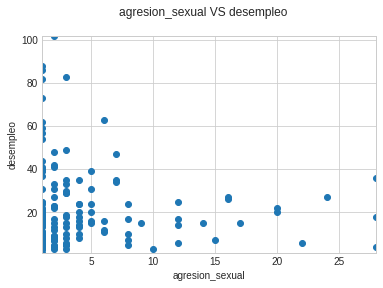

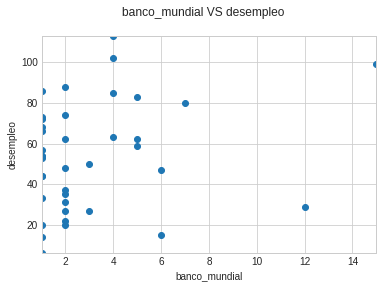

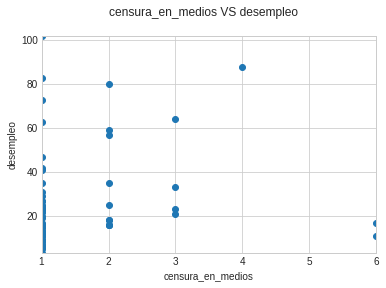

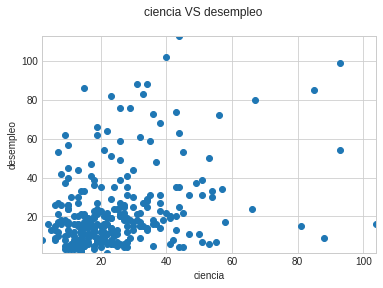

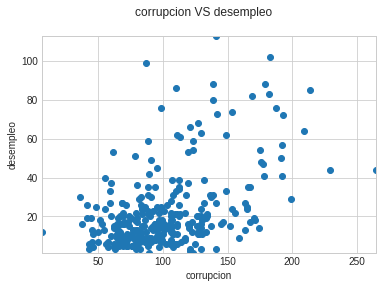

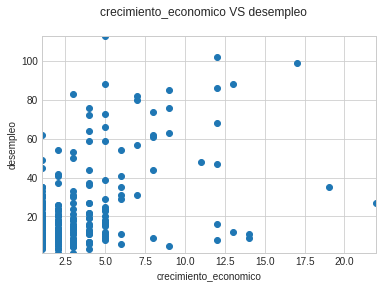

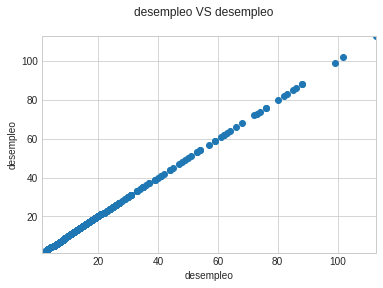

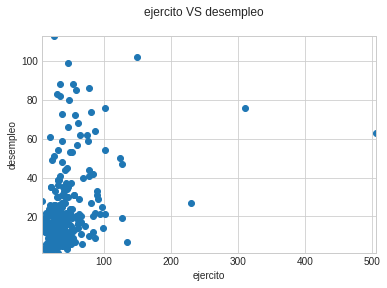

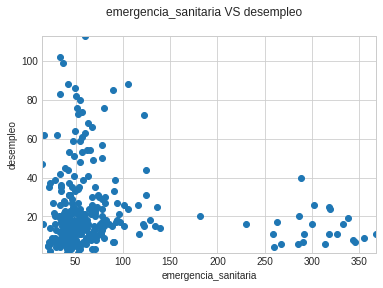

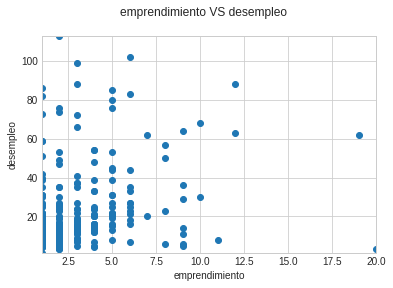

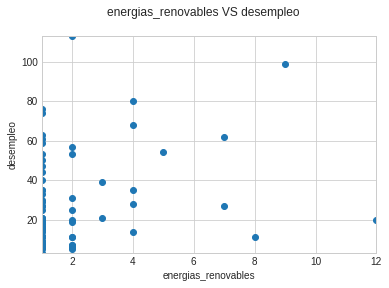

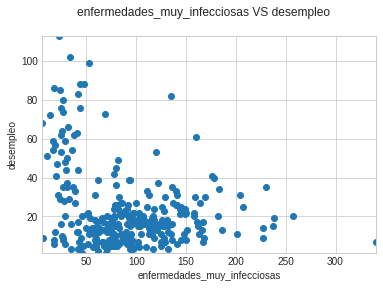

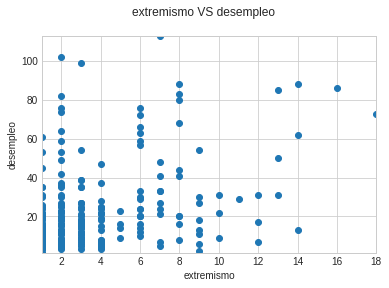

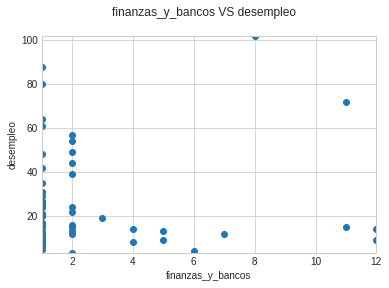

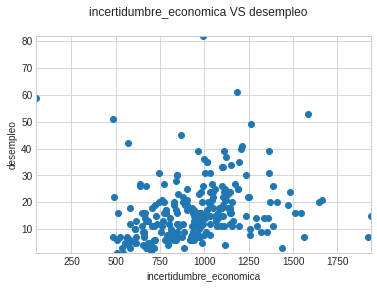

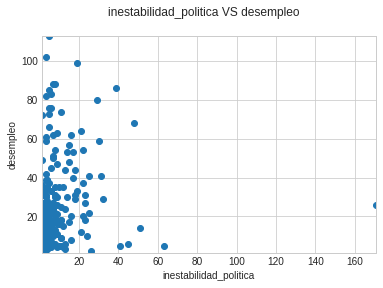

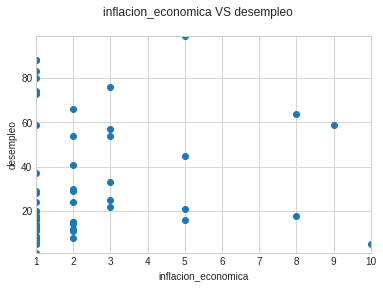

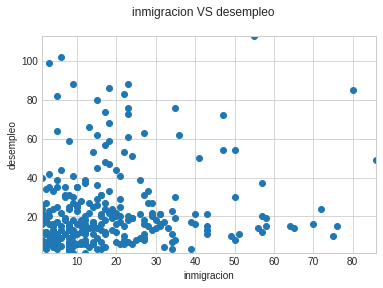

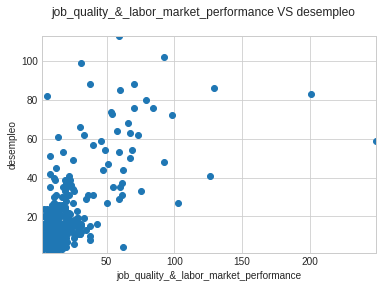

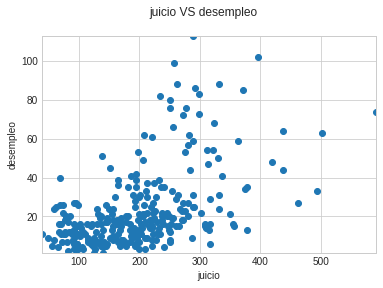

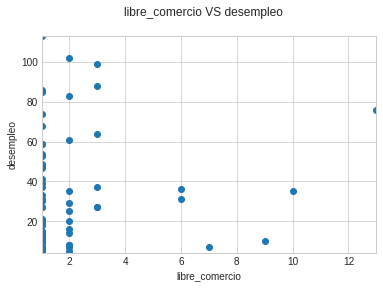

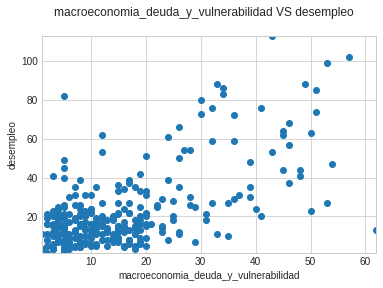

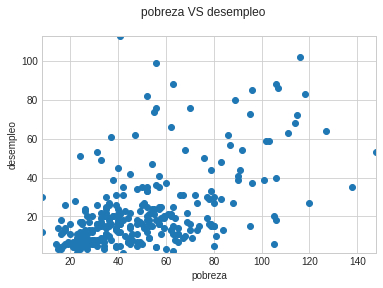

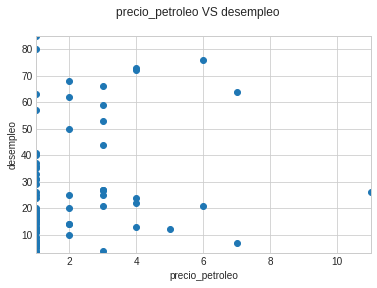

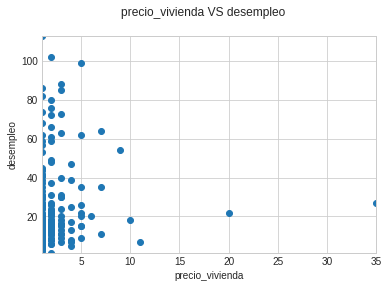

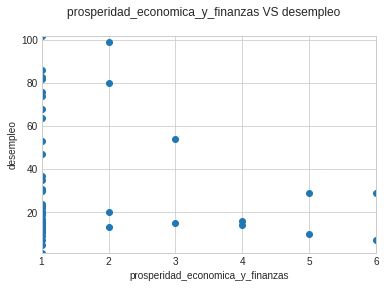

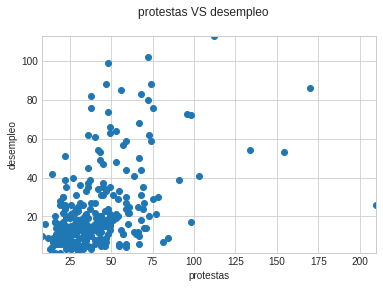

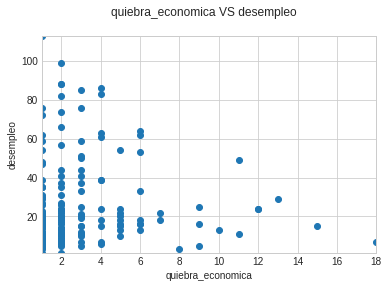

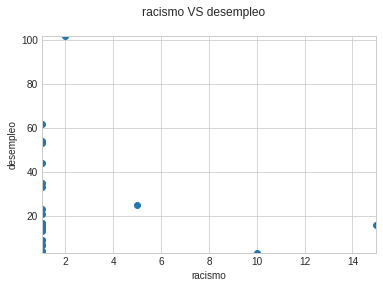

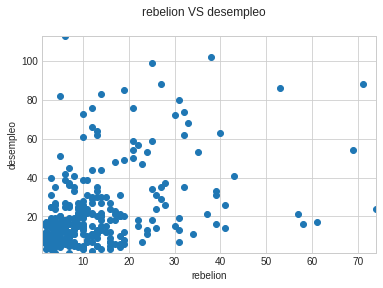

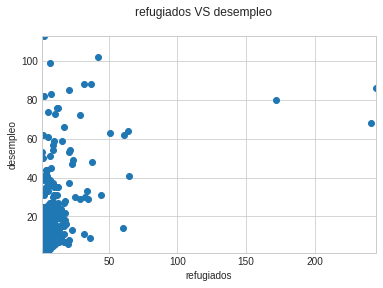

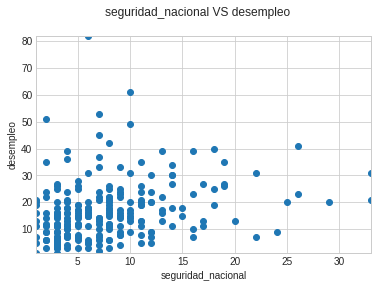

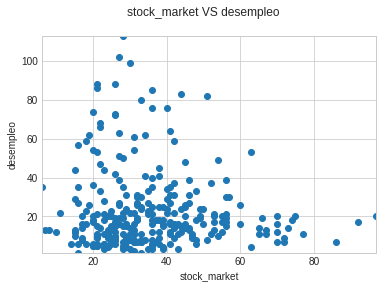

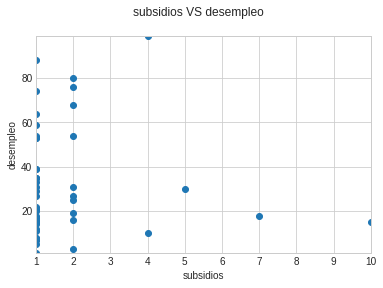

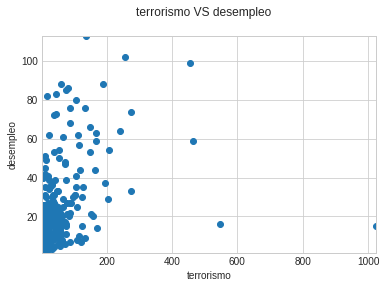

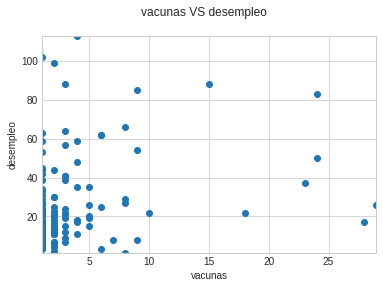

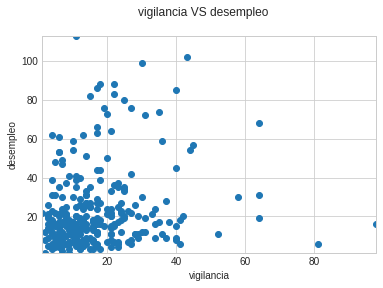

/home/vargas/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  # This is added back by InteractiveShellApp.init_path()


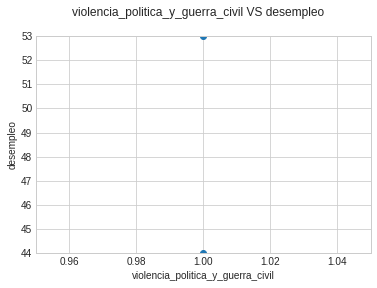

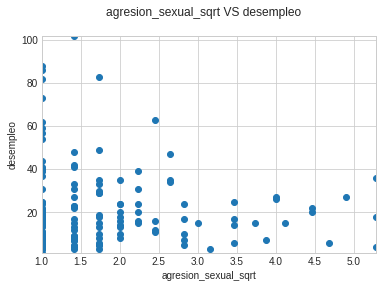

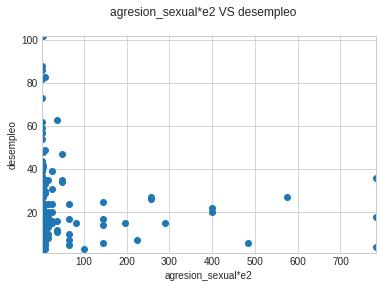

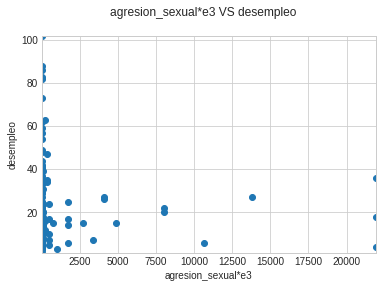

ValueError: Axis limits cannot be NaN or Inf

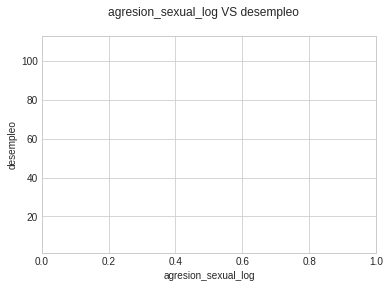

In [62]:
# lets try to find a visual correlation
for e in df_gdelt.columns:
    df2=df_gdelt.loc[df_gdelt[e] != 0]
    x = df2[e]
    y = df2.desempleo
    plt.suptitle('{} VS desempleo'.format(e))
    plt.xlabel(e)
    plt.ylabel("desempleo")
    plt.xticks
    plt.ylim(ymax = max(list(df2.desempleo)), ymin = min(list(df2.desempleo)))
    plt.xlim(xmax = max(list(df2[e])), xmin = min(list(df2[e])))
    
    plt.plot(x, y, 'o');
    plt.show()
    print("\n","\n")

In [ ]:
for e in df.columns:
    df2=df.loc[df[e] != 0]
    x = df2.index
    y = df2[e]
    plt.suptitle('{} VS Date'.format(e))
    plt.xlabel("Date")
    plt.ylabel(e)
    plt.xticks
    plt.plot(x, y, 'k');
    plt.show()

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = df.index

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = df.desempleo
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()